In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the CSV file into a pandas DataFrame
dataset = pd.read_csv(r"C:\Users\Prathamesh\Downloads\Uncleaned_employees_final_dataset (1).csv\Uncleaned_employees_final_dataset (1).csv")

# Display the first few rows of the DataFrame
dataset.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [7]:
# Checking for missing values in the dataset
dataset.isnull().sum()

employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

In [8]:
#overview of the data
dataset.info

<bound method DataFrame.info of        employee_id         department     region  education gender  \
0             8724         Technology  region_26  Bachelors      m   
1            74430                 HR   region_4  Bachelors      f   
2            72255  Sales & Marketing  region_13  Bachelors      m   
3            38562        Procurement   region_2  Bachelors      f   
4            64486            Finance  region_29  Bachelors      m   
...            ...                ...        ...        ...    ...   
17412        64573         Technology   region_7  Bachelors      f   
17413        49584                 HR   region_7  Bachelors      m   
17414        49584                 HR   region_7  Bachelors      m   
17415        49584                 HR   region_7  Bachelors      m   
17416        64573                 HR   region_7  Bachelors      f   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   24       

In [9]:
#basic statistic
dataset.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
count,17417.000000,17417.000000,17417.000000,16054.000000,17417.000000,17417.000000,17417.000000,17417.000000
mean,39083.491129,1.250732,34.807774,3.345459,5.801860,0.358845,0.023368,63.176322
std,22707.024087,0.595692,7.694046,1.265386,4.175533,0.479675,0.151074,13.418179
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19281.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,39122.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58838.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,75.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [10]:
#columns name
dataset.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score'],
      dtype='object')

In [11]:
# Filling missing values in the 'education' column with the mode (most common value)
dataset['education'].fillna(dataset['education'].mode()[0], inplace=True)

# Filling missing values in the 'previous_year_rating' column with the median
dataset['previous_year_rating'].fillna(dataset['previous_year_rating'].median(), inplace=True)

# Checking if all missing values have been filled
dataset.isnull().sum()

C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_11472\1437903406.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['education'].fillna(dataset['education'].mode()[0], inplace=True)
C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_11472\1437903406.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

employee_id              0
department               0
region                   0
education                0
gender                   0
recruitment_channel      0
no_of_trainings          0
age                      0
previous_year_rating     0
length_of_service        0
KPIs_met_more_than_80    0
awards_won               0
avg_training_score       0
dtype: int64

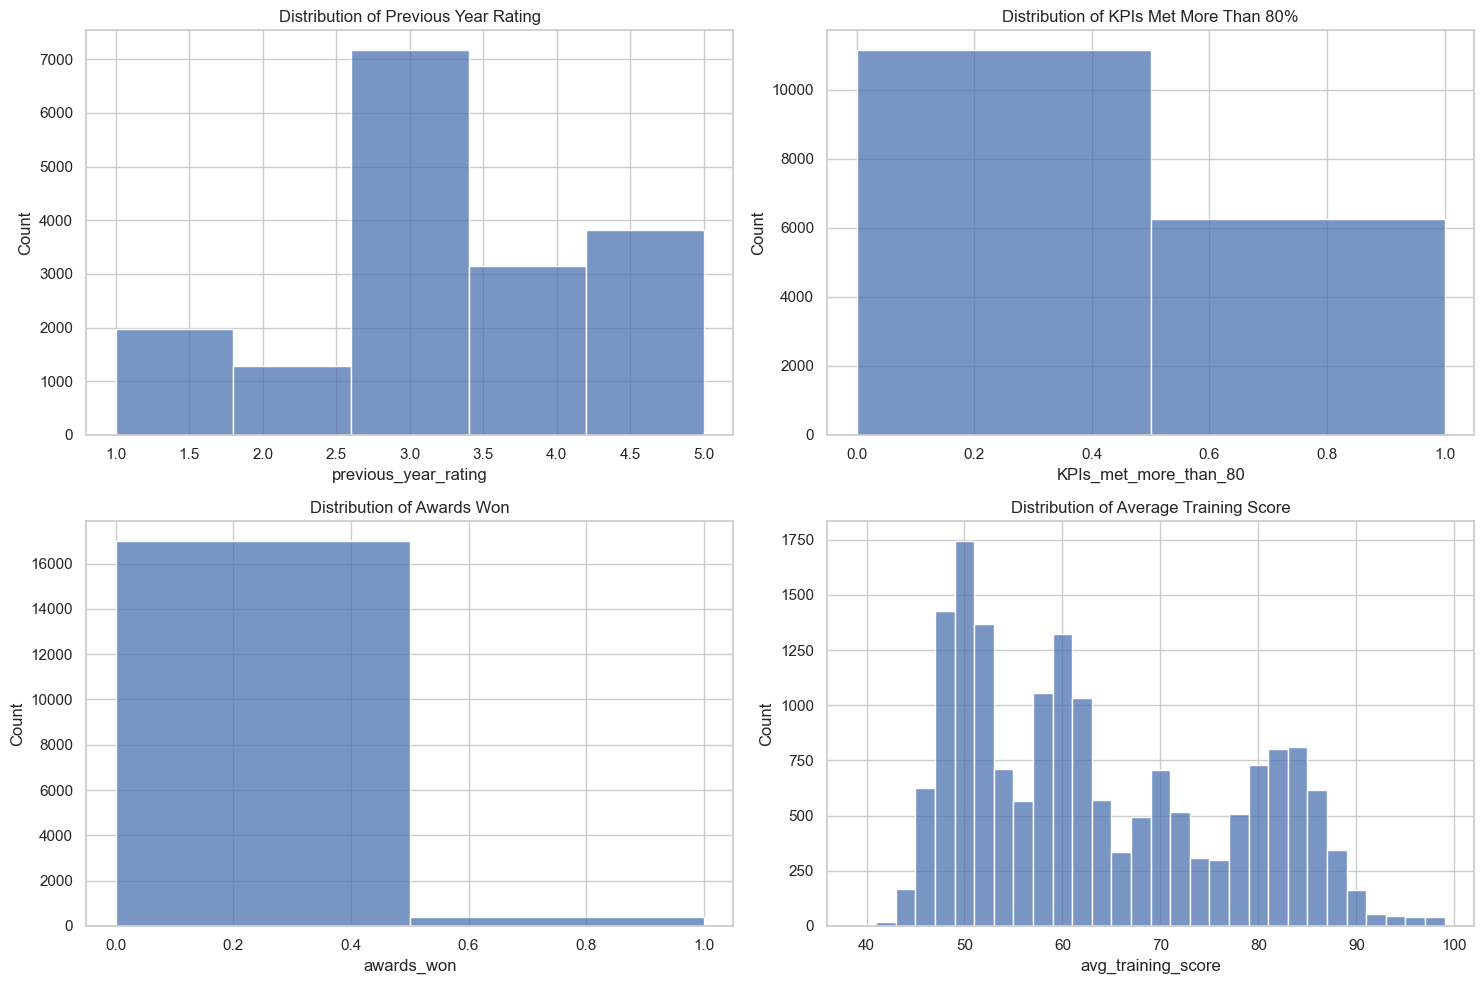

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set(style="whitegrid")

# Creating a figure for the plots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plotting the distributions of the performance indicators
sns.histplot(dataset['previous_year_rating'], ax=ax[0, 0], kde=False, bins=5)
ax[0, 0].set_title('Distribution of Previous Year Rating')

sns.histplot(dataset['KPIs_met_more_than_80'], ax=ax[0, 1], kde=False, bins=2)
ax[0, 1].set_title('Distribution of KPIs Met More Than 80%')

sns.histplot(dataset['awards_won'], ax=ax[1, 0], kde=False, bins=2)
ax[1, 0].set_title('Distribution of Awards Won')

sns.histplot(dataset['avg_training_score'], ax=ax[1, 1], kde=False, bins=30)
ax[1, 1].set_title('Distribution of Average Training Score')

# Adjusting the layout
plt.tight_layout()
plt.show()

In [16]:
#show first 5 rows 
print("first 5 rows:\n",dataset[:5])

first 5 rows:
    employee_id         department     region  education gender  \
0         8724         Technology  region_26  Bachelors      m   
1        74430                 HR   region_4  Bachelors      f   
2        72255  Sales & Marketing  region_13  Bachelors      m   
3        38562        Procurement   region_2  Bachelors      f   
4        64486            Finance  region_29  Bachelors      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   3.0   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met_more_than_80  awards_won  avg_training_score  
0                  1                      1           0                  77  
1                

In [17]:
#print shape of data
print ("shape:",dataset.shape)

shape: (17417, 13)


In [19]:
#calculate number of training
no_of_trainings = dataset['no_of_trainings'].sum()
print("Total Numbers of training gives: ",no_of_trainings)

Total Numbers of training gives:  21784


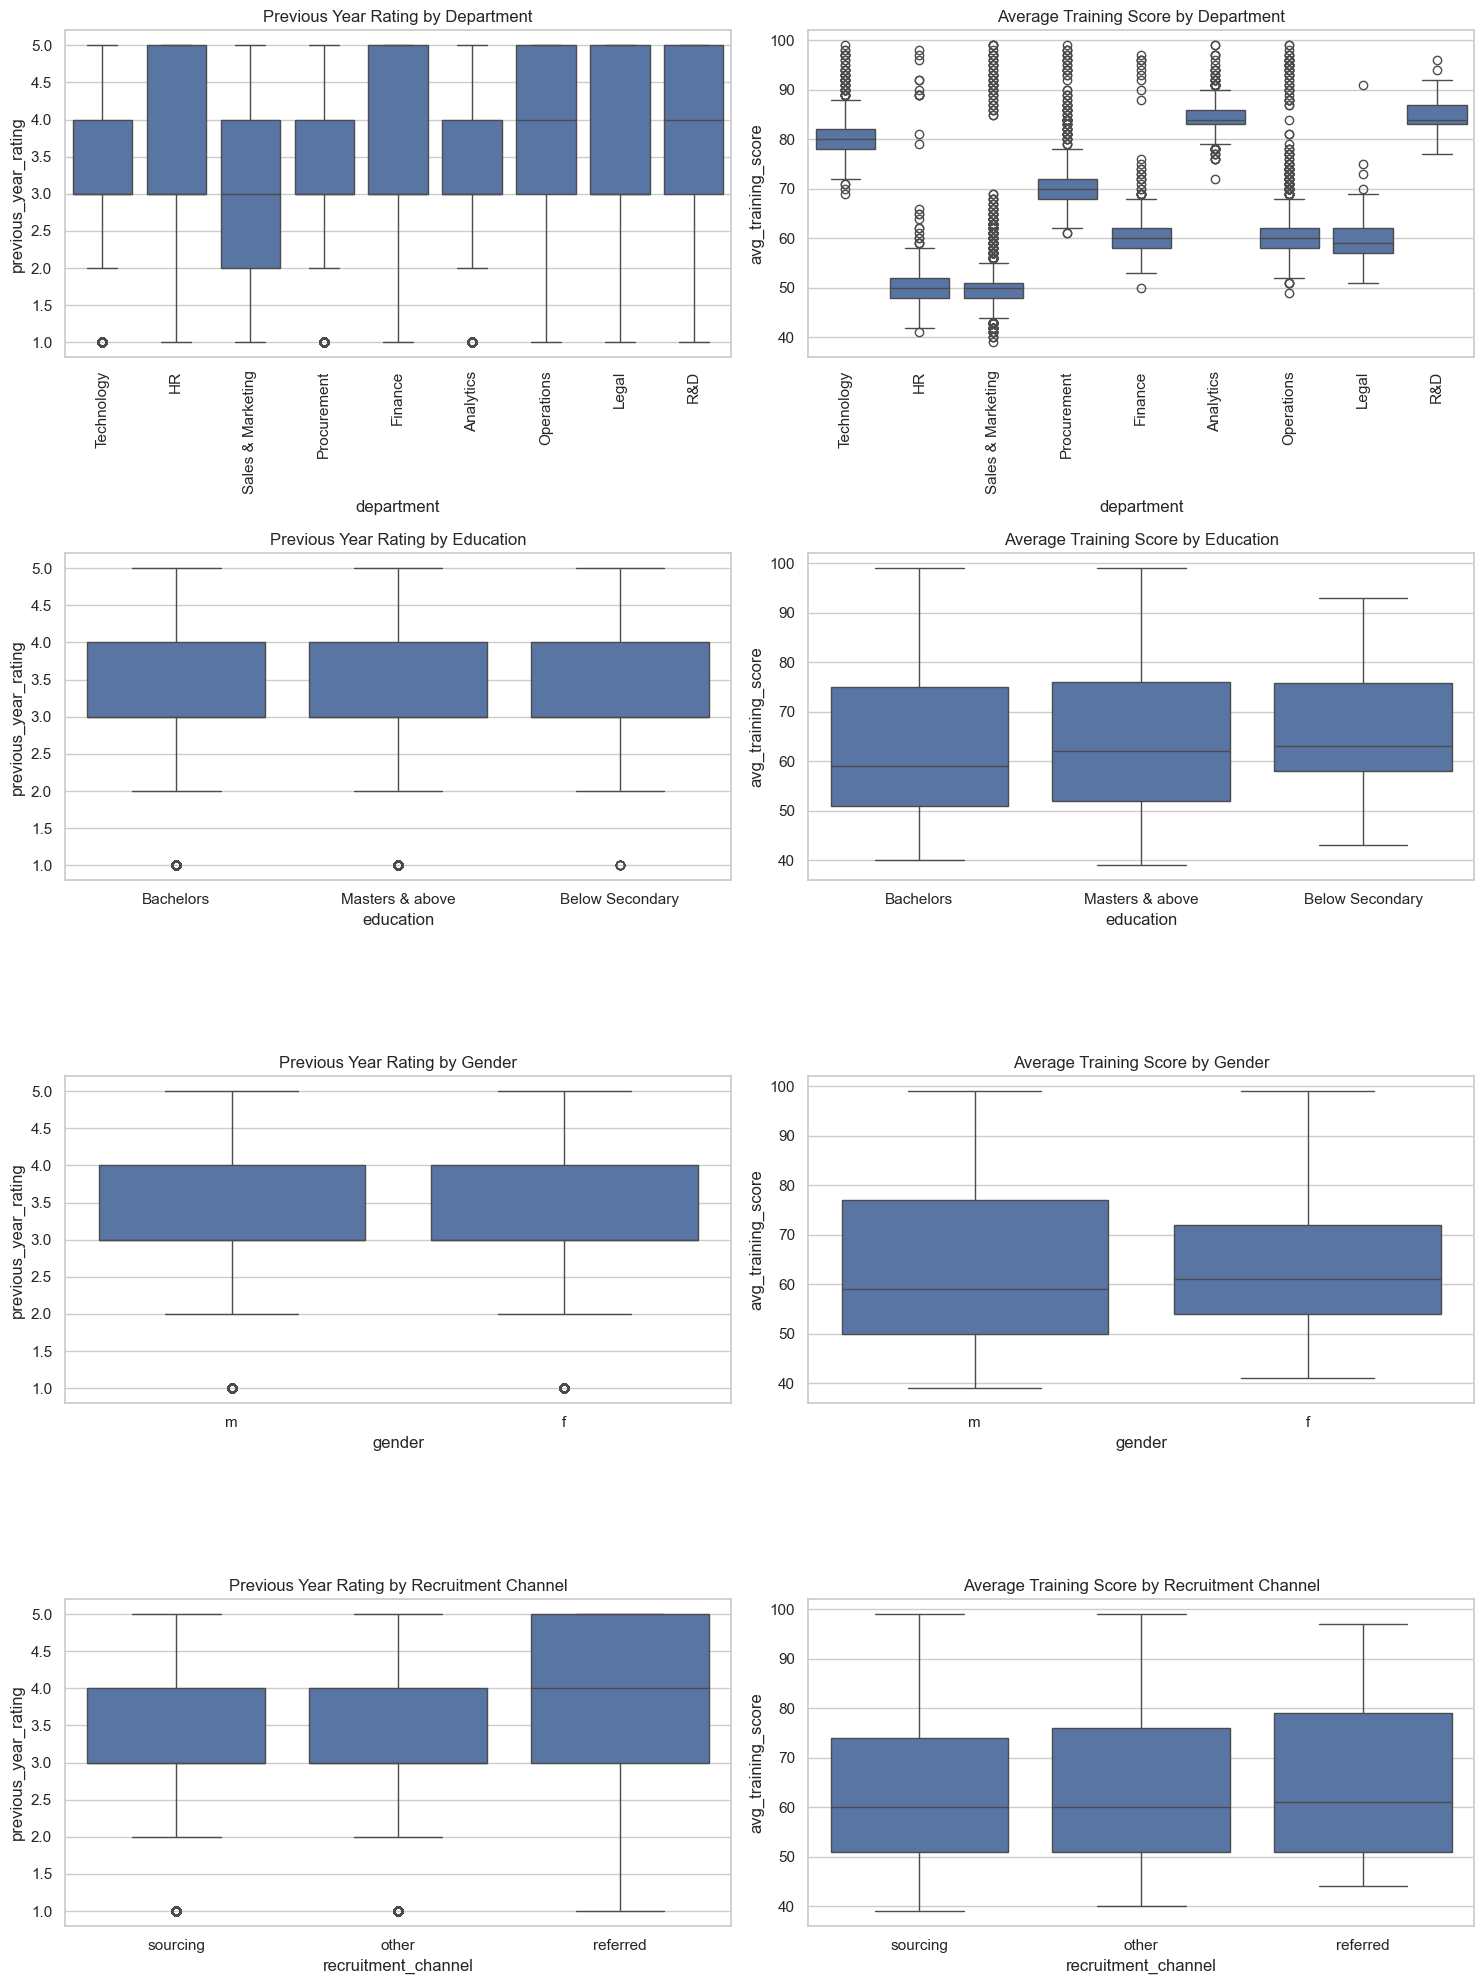

In [23]:
# Creating a figure for the plots
fig, ax = plt.subplots(4, 2, figsize=(15, 20))

# Plotting the relationships between the performance indicators and the 'department' feature
sns.boxplot(x='department', y='previous_year_rating', data=dataset, ax=ax[0, 0])
ax[0, 0].set_title('Previous Year Rating by Department')
ax[0, 0].tick_params(axis='x', rotation=90)

sns.boxplot(x='department', y='avg_training_score', data=dataset, ax=ax[0, 1])
ax[0, 1].set_title('Average Training Score by Department')
ax[0, 1].tick_params(axis='x', rotation=90)

# Plotting the relationships between the performance indicators and the 'education' feature
sns.boxplot(x='education', y='previous_year_rating', data=dataset, ax=ax[1, 0])
ax[1, 0].set_title('Previous Year Rating by Education')

sns.boxplot(x='education', y='avg_training_score', data=dataset, ax=ax[1, 1])
ax[1, 1].set_title('Average Training Score by Education')

# Plotting the relationships between the performance indicators and the 'gender' feature
sns.boxplot(x='gender', y='previous_year_rating', data=dataset, ax=ax[2, 0])
ax[2, 0].set_title('Previous Year Rating by Gender')

sns.boxplot(x='gender', y='avg_training_score', data=dataset, ax=ax[2, 1])
ax[2, 1].set_title('Average Training Score by Gender')

# Plotting the relationships between the performance indicators and the 'recruitment_channel' feature
sns.boxplot(x='recruitment_channel', y='previous_year_rating', data=dataset, ax=ax[3, 0])
ax[3, 0].set_title('Previous Year Rating by Recruitment Channel')

sns.boxplot(x='recruitment_channel', y='avg_training_score', data=dataset, ax=ax[3, 1])
ax[3, 1].set_title('Average Training Score by Recruitment Channel')

# Adjusting the layout
plt.tight_layout()
plt.show()